<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/06/PTE_DL6_PICSIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Képek összehasonlítása, hasonló képek keresése

Importáljuk be a szükséges könyvtárakat

In [ ]:
from scipy.spatial import distance
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
import cv2

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

Az InceptionV3 és a EfficientNetB0 modellt használjuk a tulajdonságok kinyeréséhez

In [ ]:
Inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True, pooling='avg', input_shape=(299, 299, 3))

96124928/96112376 [==============================] - 2s 0us/step


In [ ]:
Efficient = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=True, pooling='avg', input_shape=(224, 224, 3))

21848064/21834768 [==============================] - 0s 0us/step


In [ ]:
Inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
Efficient.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

A hálózat utolsó kimenetét használjuk fel mint tulajdonság vektort 2048 dimenziós!

In [ ]:
basemodel = Model(inputs=Inception.input, outputs=Inception.get_layer('avg_pool').output)

In [ ]:
basemodel_eff = Model(inputs=Efficient.input, outputs=Efficient.get_layer('avg_pool').output)

In [ ]:
def get_feature_vector(img):
 img1 = cv2.resize(img, (299, 299))
 feature_vector = basemodel.predict(img1.reshape(1, 299, 299, 3))
 return feature_vector

In [ ]:
def get_feature_vector_eff(img):
 img1 = cv2.resize(img, (224, 224))
 feature_vector = basemodel_eff.predict(img1.reshape(1, 224, 224, 3))
 return feature_vector

In [ ]:
def calculate_similarity(vector1, vector2):
    return 1 - distance.cosine(vector1, vector2)

In [ ]:
img1 = mpimg.imread('KM1.jpg')
img2 = mpimg.imread('KM3.jpg')
img3 = mpimg.imread('Ákos2.jpg')
img=[img1,img2,img3]

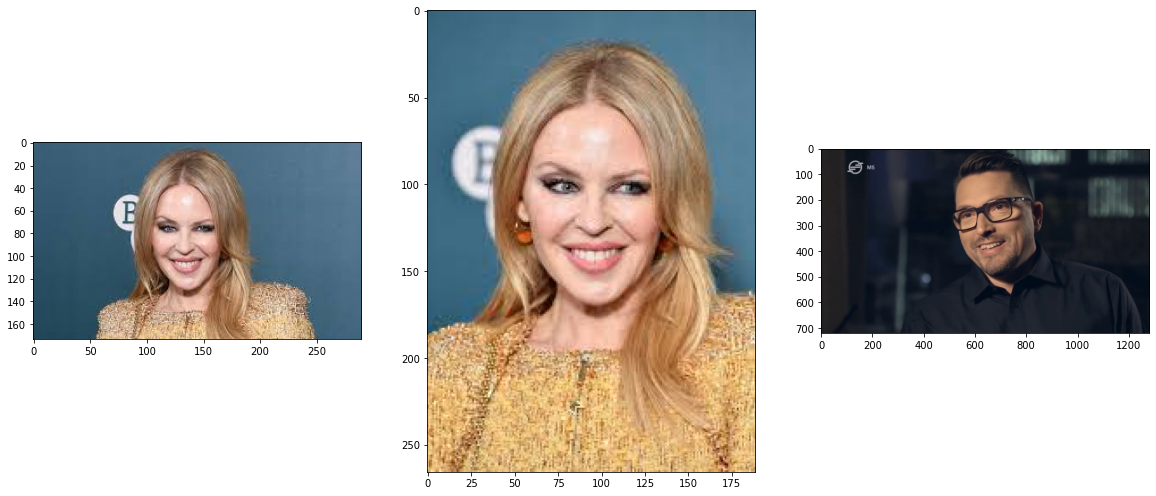

In [ ]:
fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 1
for i in range(1,4):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1])
plt.show()

In [ ]:
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)

print(calculate_similarity(f1, f2)) 
print(calculate_similarity(f1, f3)) 

0.9419118165969849
0.8433383703231812


In [ ]:
f1 = get_feature_vector_eff(img1)
f2 = get_feature_vector_eff(img2)
f3 = get_feature_vector_eff(img3)

print(calculate_similarity(f1, f2)) 
print(calculate_similarity(f1, f3)) 

0.5064274668693542
0.039243243634700775


In [ ]:
img1 = mpimg.imread('pizza1.jpg')
img2 = mpimg.imread('pizza2.jpg')
img3 = mpimg.imread('KM1.jpg')
img=[img1,img2,img3]

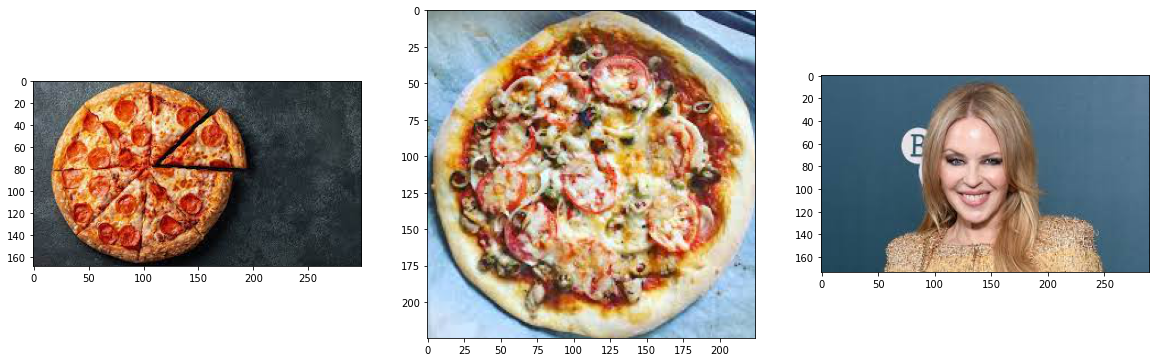

In [ ]:
fig = plt.figure(figsize=(20, 20))
columns = 3
rows = 1
for i in range(1,4):
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[i-1])
plt.show()

In [ ]:
f1 = get_feature_vector(img1)
f2 = get_feature_vector(img2)
f3 = get_feature_vector(img3)

print(calculate_similarity(f1, f2)) 
print(calculate_similarity(f2, f3)) 

0.8211407661437988
0.8071485757827759


In [ ]:
f1 = get_feature_vector_eff(img1)
f2 = get_feature_vector_eff(img2)
f3 = get_feature_vector_eff(img3)

print(calculate_similarity(f1, f2)) 
print(calculate_similarity(f2, f3)) 

0.4185612201690674
0.04772648587822914


In [ ]:
f1

array([[-0.10289621, -0.13697313, -0.14082834, ...,  0.34915745,
        -0.01457571, -0.12549083]], dtype=float32)